In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Sentimental Analysis/Restaurant_Reviews.tsv",delimiter="\t",quoting=3)
data.head(10)

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0
8,The fries were great too.,1
9,A great touch.,1


# **Data Wrangling**


In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer as ps

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus = []

for i in range(0,1000):

  review = re.sub(pattern='[^a-zA-Z]',repl=' ',string=data['Review'][i])
  review = review.lower()
  review_words = review.split()
  review_words = [ word for word in review_words if not word in set(stopwords.words('english'))]
  review = [ps().stem(word) for word in review_words]
  review = ' '.join(review)
  corpus.append(review)

corpus[:1000]

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[: ,1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

<h1><i><b>Multinomial Naive Bayes Classifier</i></b></h1>



In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier =  MultinomialNB()
classifier.fit(X_train,y_train)

MultinomialNB()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 76.0%
The precision score for the model is 74.07407407407408%
The recall score for the model is 80.0%


---
<h3>Hyperparameter Tuning</h3>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
best_score = 0.0
alp = 0.0
for i in np.arange (0.1,1.1,0.1):
  classifier = MultinomialNB(alpha = i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    alp = i

print("Best accuracy Score is "+str(best_score*100)+" for alpha "+str(alp))

Best accuracy Score is 76.0 for alpha 1.0


In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier =  MultinomialNB(alpha=0.2)
classifier.fit(X_train,y_train)

MultinomialNB(alpha=0.2)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 74.5%
The precision score for the model is 74.74747474747475%
The recall score for the model is 74.0%


---
<h3> Testing with random inputs</h3>

---

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Negative
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


In [ ]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[75, 25],
       [26, 74]])

Text(95.72222222222221, 0.5, 'Actual Values')

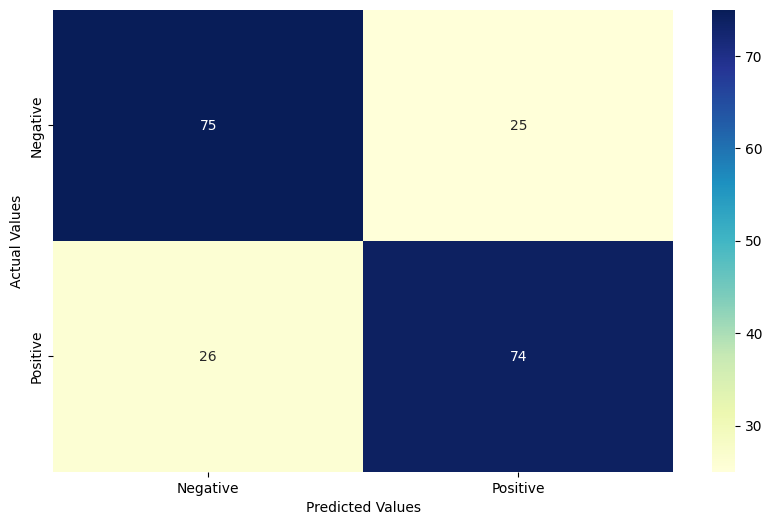

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

<h1><i><b>Logistic Regression</h1>

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 77.22772277227723%
The recall score for the model is 78.0%


---
<h3> Testing with random inputs</h3>

---

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is good and service is also good',
                 'Not tasty and the texture was just nasty',
                 'Not Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Negative
The review 5 is Negative


In [ ]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[77, 23],
       [22, 78]])

Text(95.72222222222221, 0.5, 'Actual Values')

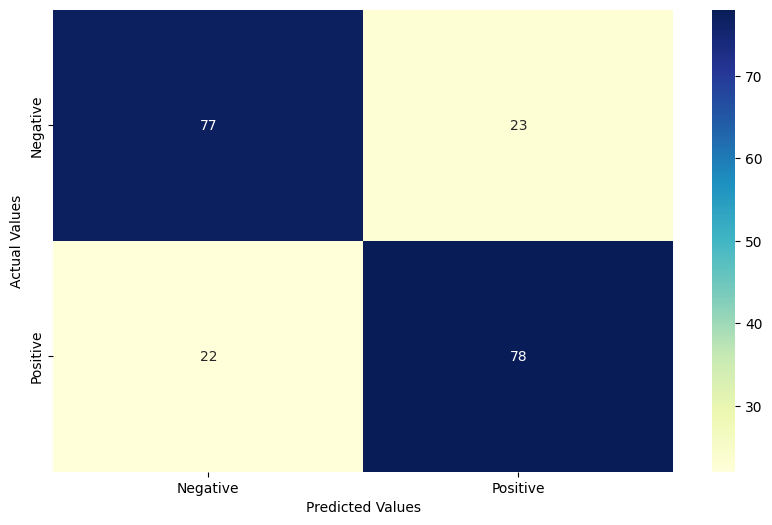

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

<h1><b><i>Extra Trees Classifier</b></h1>

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier()
classifier.fit(X_train,y_train)

ExtraTreesClassifier()

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 78.5%
The precision score for the model is 80.64516129032258%
The recall score for the model is 75.0%


---
<h3>Hyperparameter Tuning</h3>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
best_score = 0.0
dep = 0
for i in range (1,50):
  classifier = ExtraTreesClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 80.5 for max_depth 13


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
classifier = ExtraTreesClassifier(criterion="entropy", max_depth=dep)
classifier.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=13)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 77.5%
The precision score for the model is 81.60919540229885%
The recall score for the model is 71.0%


---
<h3> Testing with random inputs</h3>

---

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is bad and service is also not good',
                 'Not tasty and the texture was just nasty',
                 'Highly recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Negative
The review 3 is Negative
The review 4 is Positive
The review 5 is Negative


In [ ]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[84, 16],
       [29, 71]])

Text(95.72222222222221, 0.5, 'Actual Values')

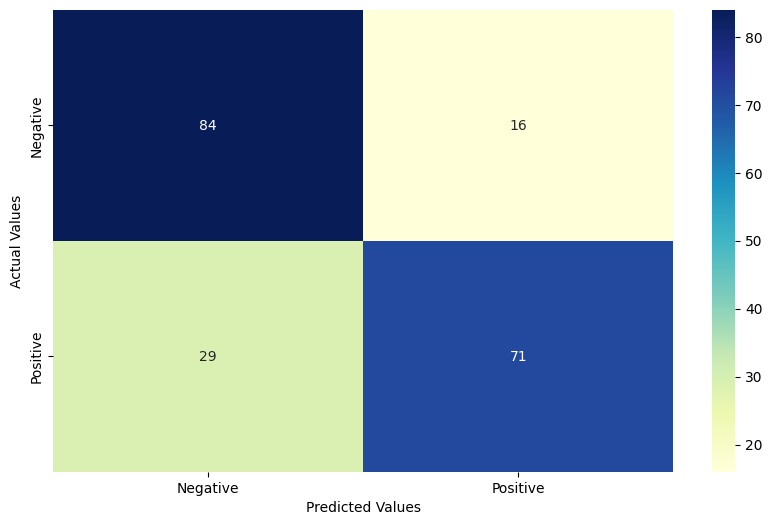

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")

<h1><i><b>Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=1)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 74.5%
The precision score for the model is 74.74747474747475%
The recall score for the model is 74.0%


---
<h3>Hyperparameter Tuning</h3>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
best_score = 0.0
dep = 0
for i in range (10,100):
  classifier = DecisionTreeClassifier(criterion="entropy", max_depth=i)
  classifier.fit(X_train,y_train)
  y_predict = classifier.predict(X_test)
  score = accuracy_score(y_test,y_predict)
  if score > best_score:
    best_score = score
    dep = i

print("Best accuracy Score is "+str(best_score*100)+" for max_depth "+str(dep))

Best accuracy Score is 80.5 for max_depth 37


In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion="entropy", max_depth=30)
classifier.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30)

In [ ]:
y_predict = classifier.predict(X_test)
y_predict

array([1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score1 = accuracy_score(y_test,y_predict)
score2 = precision_score(y_test,y_predict)
score3 = recall_score(y_test,y_predict)

print(f"The accuracy score for the model is {score1*100}%")
print(f"The precision score for the model is {score2*100}%")
print(f"The recall score for the model is {score3*100}%")

The accuracy score for the model is 79.5%
The precision score for the model is 89.33333333333333%
The recall score for the model is 67.0%


---
<h3> Testing with random inputs</h3>

---

In [ ]:
def predict_sentiment(sample_review):
  sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ',string = sample_review)
  sample_review = sample_review.lower()
  sample_review_words = sample_review.split()
  sample_review_words = [ word for word in sample_review_words if not word in set(stopwords.words('english'))]
  final_review = [ps().stem(word) for word in sample_review_words]
  final_review = ' '.join(final_review)

  temp = cv.transform([final_review]).toarray()
  return classifier.predict(temp)

In [ ]:
sample_review = ['The food is really wonderful',
                 'The food is good and service is also good',
                 'Not tasty and the texture was just nasty',
                 'Highly not recommended',
                 'The worst was the salmon sashimi']
i=1
for sample in sample_review:
  if predict_sentiment(sample):
    print(f'The review {i} is Positive')
  else:
    print(f'The review {i} is Negative')
  i+=1

The review 1 is Positive
The review 2 is Positive
The review 3 is Negative
The review 4 is Negative
The review 5 is Negative


In [ ]:
cm=confusion_matrix(y_test,y_predict)
cm

array([[92,  8],
       [33, 67]])

Text(95.72222222222221, 0.5, 'Actual Values')

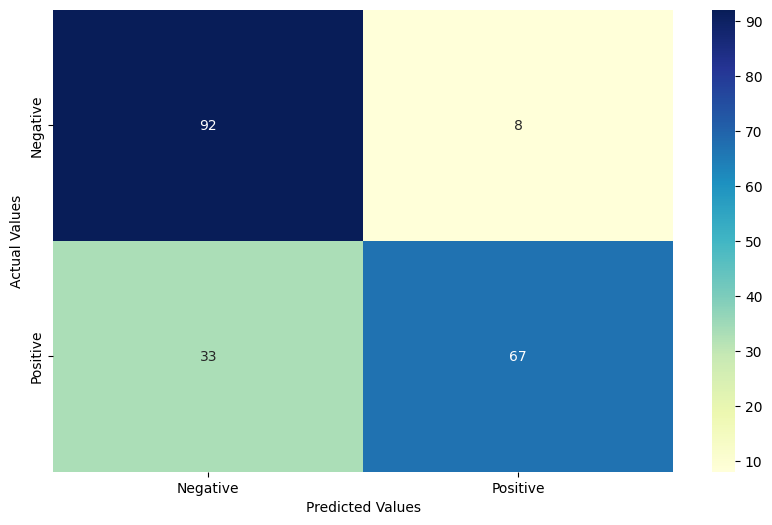

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,cmap="YlGnBu",xticklabels=['Negative','Positive'],yticklabels=['Negative','Positive'])
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")